In [62]:
#IMPORT necessary libraries
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
#import os
import seaborn as sns

reading data

In [63]:
data= pd.read_excel('Sales_project.xlsx')
sales_oder= pd.read_excel('Sales_project.xlsx','Sales Orders Sheet')
customers=pd.read_excel('Sales_project.xlsx', 'Customers Sheet')
site_location= pd.read_excel('Sales_project.xlsx','Site Location sheet')
products= pd.read_excel('Sales_project.xlsx', 'Products_Sheet')
sales_team= pd.read_excel('Sales_project.xlsx','Sales Team Sheet')

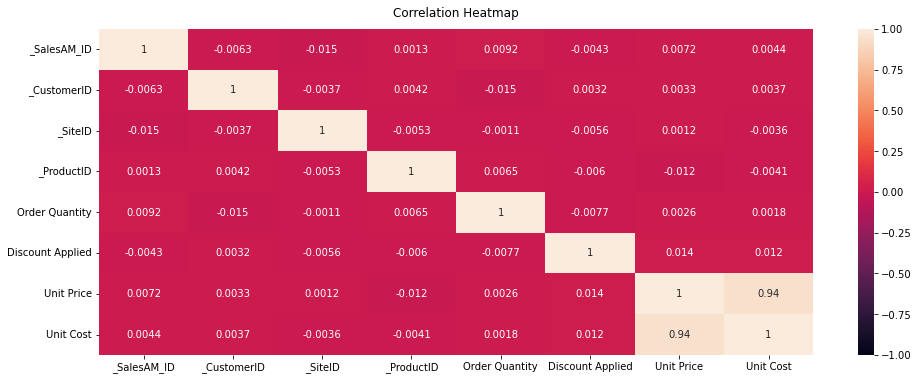

In [64]:
#correlation heatmap to see the relationship among data

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [65]:
"unique unit cost", len(set(sales_oder['Unit Cost'])),"unique unit price", len(set(sales_oder['Unit Price'])),"unique order number", len(set(sales_oder['OrderNumber']))


('unique unit cost',
 5581,
 'unique unit price',
 664,
 'unique order number',
 7991)

In [66]:
#as productid is in object datatype, we add another column for index

products_index = [a for a in range(len(products))]
products['products_index'] = products_index
#products.head()

In [67]:
# marging data in single file

df= sales_oder.join(customers.set_index('_CustomerID'), on= '_CustomerID').join(site_location.set_index('_SiteID'), on= '_SiteID').join(sales_team.set_index('_SalesAM_ID'), on= '_SalesAM_ID').join(products.set_index('products_index'), on='_ProductID', lsuffix='_left', rsuffix='_right', how='left')
df.head()

,OrderNumber,OrderDate,CurrencyCode,_SalesAM_ID,_CustomerID,_SiteID,_ProductID_left,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,SIte Name,District,AM Name,_ProductID_right,Product Name,Item/Service Description,Bandwidth
0,SO - 000101,2018-05-31,RWF,6,15,259,12,5,0.075,1963.1,1001.181,Rochester Ltd,Y,Kicukiro,Joshua Bennett,I0090,Fiber Broadband Internet,FIBER INTERNET 1MBPS,1
1,SO - 000102,2018-05-31,RWF,14,20,196,27,3,0.075,3939.6,3348.660,Pacific Ltd,N,Rwamagana,Paul Holmes,I0239,Video Conferencing Service,VIDEO CONFERENCE,0
2,SO - 000103,2018-05-31,RWF,21,16,213,16,1,0.050,1775.5,781.220,"3LAB, Ltd",E,Gakenke,Samuel Fowler,I0094,Fiber Broadband Internet,FIBER INTERNET 10MBPS,10
3,SO - 000104,2018-05-31,RWF,28,48,107,23,8,0.075,2324.9,1464.687,"Fenwal, Corp",C,Gasabo,Carlos Miller,I0167,MSS,MSS GOLD,0
4,SO - 000105,2018-05-31,RWF,22,49,111,26,8,0.100,1822.4,1476.144,Bare,G,Gasabo,Joe Price,I0230,VOIP,VOIP PHONES 21-40,0


In [68]:
# tasks
# adding relevent columns
#add another column for sales
df['sales']= (df['Order Quantity']* df['Unit Price'])-df['Discount Applied']

#add another column for months
df['month'] = pd.DatetimeIndex(df['OrderDate']).month
df.head()

,OrderNumber,OrderDate,CurrencyCode,_SalesAM_ID,_CustomerID,_SiteID,_ProductID_left,Order Quantity,Discount Applied,Unit Price,...,Customer Names,SIte Name,District,AM Name,_ProductID_right,Product Name,Item/Service Description,Bandwidth,sales,month
0,SO - 000101,2018-05-31,RWF,6,15,259,12,5,0.075,1963.1,...,Rochester Ltd,Y,Kicukiro,Joshua Bennett,I0090,Fiber Broadband Internet,FIBER INTERNET 1MBPS,1,9815.425,5
1,SO - 000102,2018-05-31,RWF,14,20,196,27,3,0.075,3939.6,...,Pacific Ltd,N,Rwamagana,Paul Holmes,I0239,Video Conferencing Service,VIDEO CONFERENCE,0,11818.725,5
2,SO - 000103,2018-05-31,RWF,21,16,213,16,1,0.050,1775.5,...,"3LAB, Ltd",E,Gakenke,Samuel Fowler,I0094,Fiber Broadband Internet,FIBER INTERNET 10MBPS,10,1775.450,5
3,SO - 000104,2018-05-31,RWF,28,48,107,23,8,0.075,2324.9,...,"Fenwal, Corp",C,Gasabo,Carlos Miller,I0167,MSS,MSS GOLD,0,18599.125,5
4,SO - 000105,2018-05-31,RWF,22,49,111,26,8,0.100,1822.4,...,Bare,G,Gasabo,Joe Price,I0230,VOIP,VOIP PHONES 21-40,0,14579.100,5


In [69]:
df.isnull().sum()


OrderNumber                   0
OrderDate                     0
CurrencyCode                  0
_SalesAM_ID                   0
_CustomerID                   0
_SiteID                       0
_ProductID_left               0
Order Quantity                0
Discount Applied              0
Unit Price                    0
Unit Cost                     0
Customer Names                0
SIte Name                     0
District                      0
AM Name                       0
_ProductID_right            152
Product Name                152
Item/Service Description    152
Bandwidth                   152
sales                         0
month                         0
dtype: int64

In [72]:
df=df.fillna(0)
df.head()

,OrderNumber,OrderDate,CurrencyCode,_SalesAM_ID,_CustomerID,_SiteID,_ProductID_left,Order Quantity,Discount Applied,Unit Price,...,Customer Names,SIte Name,District,AM Name,_ProductID_right,Product Name,Item/Service Description,Bandwidth,sales,month
0,SO - 000101,2018-05-31,RWF,6,15,259,12,5,0.075,1963.1,...,Rochester Ltd,Y,Kicukiro,Joshua Bennett,I0090,Fiber Broadband Internet,FIBER INTERNET 1MBPS,1,9815.425,5
1,SO - 000102,2018-05-31,RWF,14,20,196,27,3,0.075,3939.6,...,Pacific Ltd,N,Rwamagana,Paul Holmes,I0239,Video Conferencing Service,VIDEO CONFERENCE,0,11818.725,5
2,SO - 000103,2018-05-31,RWF,21,16,213,16,1,0.050,1775.5,...,"3LAB, Ltd",E,Gakenke,Samuel Fowler,I0094,Fiber Broadband Internet,FIBER INTERNET 10MBPS,10,1775.450,5
3,SO - 000104,2018-05-31,RWF,28,48,107,23,8,0.075,2324.9,...,"Fenwal, Corp",C,Gasabo,Carlos Miller,I0167,MSS,MSS GOLD,0,18599.125,5
4,SO - 000105,2018-05-31,RWF,22,49,111,26,8,0.100,1822.4,...,Bare,G,Gasabo,Joe Price,I0230,VOIP,VOIP PHONES 21-40,0,14579.100,5


https://github.com/PetraLee2019/Python-Sales-Data-Analysis

In [41]:
# some data are not numerical, we will have to do label incoding
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
DF['SIte Name'] = enc.fit_transform(DF['SIte Name'])
DF['District'] = enc.fit_transform(DF['District'])

DF['Product Name'] = DF['Product Name'].astype('string')
DF['Product Name'] = enc.fit_transform(DF['Product Name'])

DF['Item/Service Description'] = DF['Item/Service Description'].astype('string')
DF['Item/Service Description'] = enc.fit_transform(DF['Item/Service Description'])
DF['Customer Names'] = enc.fit_transform(DF['Customer Names'])
DF['OrderDate'] = enc.fit_transform(DF['OrderDate'])
DF.head()

,OrderNumber,OrderDate,CurrencyCode,_SalesAM_ID,_CustomerID,_SiteID,_ProductID_left,Order Quantity,Discount Applied,Unit Price,...,Customer Names,SIte Name,District,AM Name,_ProductID_right,Product Name,Item/Service Description,Bandwidth,sales,month
0,SO - 000101,0,RWF,6,15,259,12,5,0.075,1963.1,...,38,24,18,Joshua Bennett,I0090,9,15,1,9815.425,5
1,SO - 000102,0,RWF,14,20,196,27,3,0.075,3939.6,...,33,13,42,Paul Holmes,I0239,4,32,0,11818.725,5
2,SO - 000103,0,RWF,21,16,213,16,1,0.050,1775.5,...,1,4,5,Samuel Fowler,I0094,9,11,10,1775.450,5
3,SO - 000104,0,RWF,28,48,107,23,8,0.075,2324.9,...,18,2,6,Carlos Miller,I0167,12,28,0,18599.125,5
4,SO - 000105,0,RWF,22,49,111,26,8,0.100,1822.4,...,8,6,6,Joe Price,I0230,2,35,0,14579.100,5


[Text(0.5, 0, 'OrderDate'),
 Text(1.5, 0, '_SalesAM_ID'),
 Text(2.5, 0, '_CustomerID'),
 Text(3.5, 0, '_SiteID'),
 Text(4.5, 0, '_ProductID_left'),
 Text(5.5, 0, 'Order Quantity'),
 Text(6.5, 0, 'Discount Applied'),
 Text(7.5, 0, 'Unit Price'),
 Text(8.5, 0, 'Unit Cost'),
 Text(9.5, 0, 'Customer Names'),
 Text(10.5, 0, 'SIte Name'),
 Text(11.5, 0, 'District'),
 Text(12.5, 0, 'Product Name'),
 Text(13.5, 0, 'Item/Service Description'),
 Text(14.5, 0, 'sales'),
 Text(15.5, 0, 'month')]

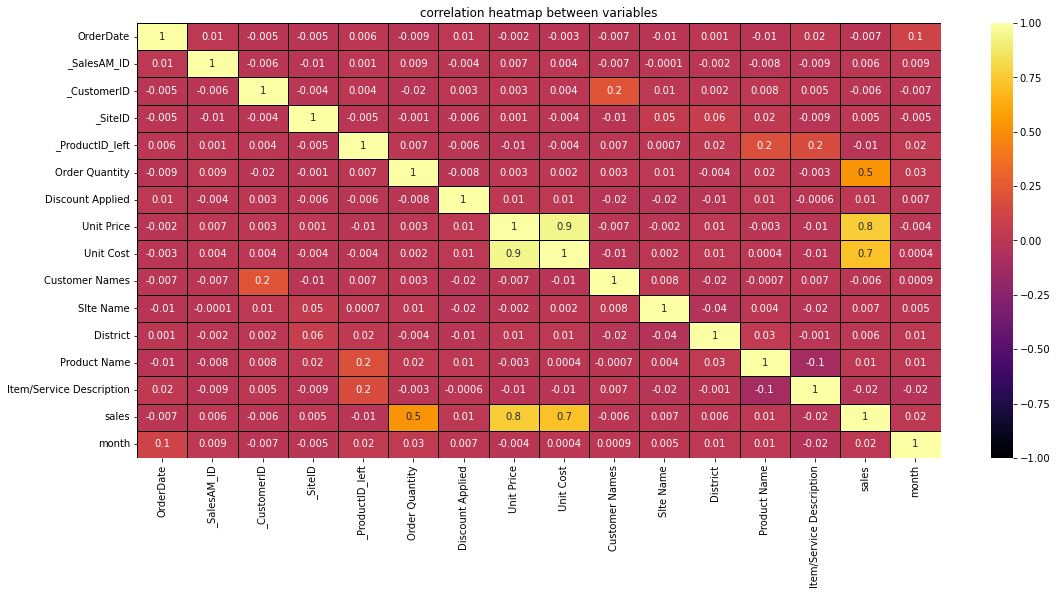

In [42]:
fig = (18,8)
plt.figure(figsize=fig)
heatmap = sns.heatmap(DF.corr(method='pearson'), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
heatmap.set_title('correlation heatmap between variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

data analysis

In [43]:
DF.describe()

,OrderDate,_SalesAM_ID,_CustomerID,_SiteID,_ProductID_left,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,SIte Name,District,Product Name,Item/Service Description,sales,month
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,472.459142,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394,2284.536504,1431.911054,24.465023,12.485171,19.749093,6.242022,23.024402,10348.118192,7.054561
std,273.860273,7.986086,14.414883,105.903946,13.526545,2.312631,0.085570,1673.096364,1112.413043,14.253594,7.543549,12.432023,3.619235,13.489932,10021.419210,3.368822
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,167.500000,68.675000,0.000000,0.000000,0.000000,0.000000,0.000000,167.100000,1.000000
25%,230.500000,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000,1031.800000,606.115500,12.000000,6.000000,6.000000,3.000000,11.000000,3195.850000,4.000000
50%,472.000000,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000,1849.200000,1080.576000,24.000000,12.000000,18.000000,6.000000,23.000000,6994.700000,7.000000
75%,712.000000,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000,3611.300000,2040.250500,37.000000,19.000000,32.000000,9.000000,35.000000,14780.100000,10.000000
max,944.000000,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000,6566.000000,5498.556000,49.000000,25.000000,42.000000,12.000000,46.000000,52313.550000,12.000000


In [44]:
#best month for sales and how much earned
best_month= DF.groupby('month').sum()
best_month

,OrderDate,_SalesAM_ID,_CustomerID,_SiteID,_ProductID_left,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,SIte Name,District,Product Name,Item/Service Description,sales
month,,,,,,,,,,,,,,,
1,231114,7782,14558,103924,13462,2555,62.275,1383322.2,863651.239,13892,6765,10756,3563,13271,6205048.925
2,229248,7324,13005,93757,11268,2258,56.750,1119228.3,693062.271,13058,6389,10288,3102,11511,4930694.350
3,216351,6491,11601,84991,10226,1983,51.400,1009870.9,631004.928,10836,5658,8747,2920,10379,4513577.800
4,266199,7790,13127,96358,12755,2387,63.650,1200485.9,751081.926,12623,6593,10510,3279,13071,5334462.950
5,286262,8031,14581,102208,13059,2527,62.775,1216941.1,760856.422,13738,6992,10787,3273,12639,5652419.025
6,278993,10321,18353,132408,17890,3163,87.375,1725893.2,1085459.697,17769,9364,14319,4519,17051,7400739.325
7,334294,11492,20279,148440,18799,3596,88.375,1787178.1,1122240.687,19071,9767,15682,4849,18470,8110790.925
8,339446,11788,19673,143191,18550,3549,88.525,1820256.0,1139985.570,18590,9956,15646,4953,18460,8049010.075
9,352549,10588,19433,138864,18066,3403,84.925,1695743.2,1069578.419,18592,9419,14754,4783,17116,7789167.575


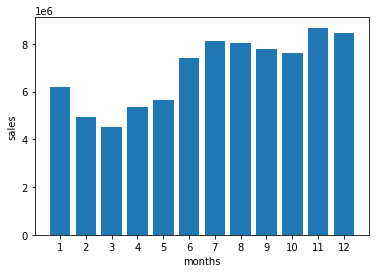

In [45]:
months= range(1,13)
plt.bar(months, best_month['sales'])
plt.xticks(months)
plt.ylabel('sales')
plt.xlabel('months')
plt.show()

In [46]:
# THE district THAT WAS BEST FOR SALES
best_district= DF.groupby('District').sum()
best_district

,OrderDate,_SalesAM_ID,_CustomerID,_SiteID,_ProductID_left,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,SIte Name,Product Name,Item/Service Description,sales,month
District,,,,,,,,,,,,,,,
0,8090,403,574,1254,504,107,2.500,36106.3,22300.012,439,88,119,563,1.783314e+05,135
1,12629,361,601,1175,637,120,2.025,44454.5,26553.574,633,500,159,520,2.129776e+05,169
2,130587,4100,6801,56839,6229,1287,32.900,646101.1,405657.999,6991,3908,1804,6757,2.948356e+06,2029
3,26093,935,1671,9410,1467,296,7.000,145771.9,91362.138,1515,1002,371,1212,7.281356e+05,429
4,12097,352,772,783,607,112,3.025,60748.9,37641.069,765,54,149,577,2.219613e+05,163
5,196392,6049,10900,82119,10362,1953,52.625,969536.9,615347.430,10575,3800,2533,9607,4.461920e+06,3006
6,651125,19727,34170,198324,31463,6049,154.775,3061457.8,1911853.509,32947,16974,8233,31172,1.382780e+07,9378
7,87601,2616,4907,48667,4303,814,21.950,398958.2,246193.577,4540,2521,1133,4033,1.864327e+06,1266
8,52368,1682,3208,17617,2748,517,13.150,236349.2,151804.580,2927,940,672,2655,1.064423e+06,797


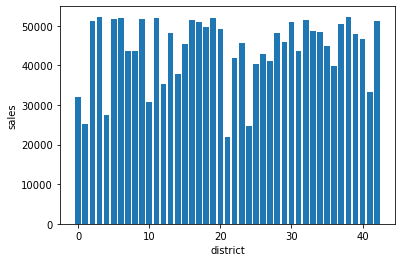

In [59]:
districts= [District for District in DF.groupby('District')]
sales= DF['sales']
X= DF['District']
Y= sales
plt.bar(X, Y)
# plt.bar(districts, best_district['sales'])
# plt.xticks(districts, rotation='vertical', size=8)
plt.ylabel('sales')
plt.xlabel('district')
plt.show()

In [61]:
# #products that ARE SOLD ON SAME DATE

# dataframe=DF[DF['OrderDate'].duplicated(keep=False)]
# dataframe.head(50)
# # same_date= DF.groupby('OrderDate')
# # same_date.head()



In [77]:
DF['Product Name'] = DF['Product Name'].astype('string')
DF['OrderDate'] = DF['OrderDate'].astype('string')

daf= DF[DF['OrderDate'].duplicated(keep=False)]
daf['grouped']= daf.groupby('OrderNumber')['Product Name'].transform(lambda x: ','.join(x))
daf= daf[['OrderNumber','grouped']].drop_duplicates()
daf.head(100)

C:\Users\USER\AppData\Local\Temp\ipykernel_8944\3385652558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daf['grouped']= daf.groupby('OrderNumber')['Product Name'].transform(lambda x: ','.join(x))


,OrderNumber,grouped
0,SO - 000101,Fiber Broadband Internet
1,SO - 000102,Video Conferencing Service
2,SO - 000103,Fiber Broadband Internet
3,SO - 000104,MSS
4,SO - 000105,VOIP
...,...,...
95,SO - 000196,Fiber Broadband Internet
96,SO - 000197,4G LTE connectivity
97,SO - 000198,Fiber Broadband Internet
98,SO - 000199,0
